In [12]:
import pandas as pd
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
#prep data and do kmeans
df = pd.read_csv('iris_scaled.csv')
df = df.drop(columns=['target', 'species'])
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(df)


KMeans Inertia (lower is better): 196.1873119538946


In [14]:
df['clusters'] = kmeans_model.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,-0.898033,1.012401,-1.333255,-1.308624,1
1,-1.139562,-0.137353,-1.333255,-1.308624,1
2,-1.381091,0.322549,-1.390014,-1.308624,1
3,-1.501855,0.092598,-1.276496,-1.308624,1
4,-1.018798,1.242352,-1.333255,-1.308624,1


In [15]:
# do pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

Text(0.5, 1.0, 'KMeans Clustering of Iris Dataset (PCA Reduced)')

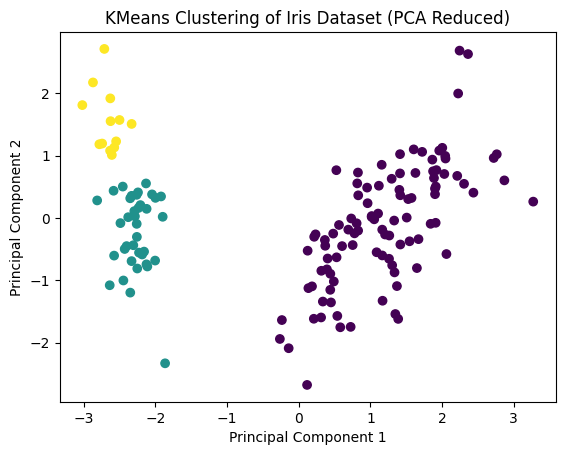

In [16]:
plt.scatter(df['PC1'], df['PC2'], c=df['clusters'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Iris Dataset (PCA Reduced)')

In [17]:
with open('../models/kmeans_iris.pkl', 'wb') as f:
    pickle.dump(kmeans_model, f)

